In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

## Read in all the data.
No spot-checking necessary, since we already did that in the previous notebook.

### IGRINS data of ASASSN15qi

In [3]:
import h5py

## Actual data

You can have pandas read the clipboard if you copy the output from the terminal.  Saves a step of copying files over, at the expense of reproducibility...

In [4]:
import pandas as pd

In [5]:
sf_dat = pd.read_csv('../data/analysis/IGRINS_LkCa4_run02_last20kMCMC.csv')
sf_dat2 = pd.read_csv('../data/analysis/IGRINS_LkCa4_run01_last20kMCMC.csv')
sf_dat3 = pd.read_csv('../data/analysis/IGRINS_ESPaDOnS_run01_last10kMCMC.csv')
sf_dat4 = pd.read_csv('../data/analysis/IGRINS_mix_emcee_last200.csv')

In [6]:
sf_dat4.columns

Index(['wl_start', 'wl_end', 'band', 'number', 'tell_trans', 'm_val',
       'wl_center', 'Teff_05p', 'Teff_50p', 'Teff_95p', 'logg_05p', 'logg_50p',
       'logg_95p', 'FeH_05p', 'FeH_50p', 'FeH_95p', 'vz_05p', 'vz_50p',
       'vz_95p', 'vi_05p', 'vi_50p', 'vi_95p', 'logO_05p', 'logO_50p',
       'logO_95p', 'c1_05p', 'c1_50p', 'c1_95p', 'c2_05p', 'c2_50p', 'c2_95p',
       'c3_05p', 'c3_50p', 'c3_95p', 'SA_05p', 'SA_50p', 'SA_95p', 'LA_05p',
       'LA_50p', 'LA_95p', 'll_05p', 'll_50p', 'll_95p', 'Teff2_05p',
       'Teff2_50p', 'Teff2_95p', 'logO2_05p', 'logO2_50p', 'logO2_95p',
       'ff_05p', 'ff_50p', 'ff_95p', 'inference'],
      dtype='object')

<Container object of 3 artists>

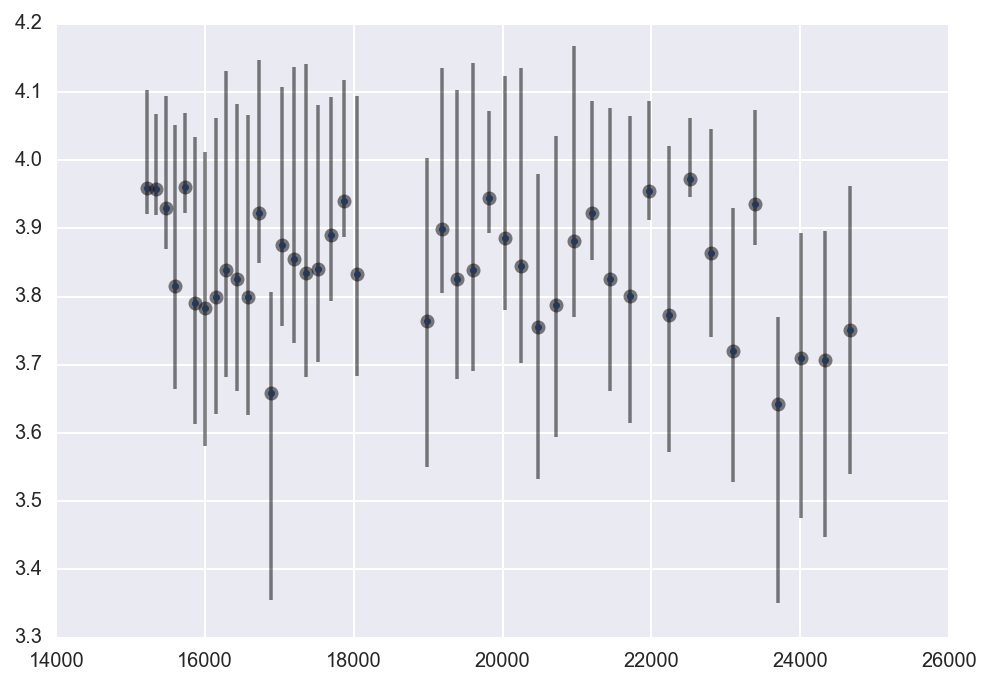

In [7]:
plt.plot(sf_dat4.wl_center, sf_dat4.logg_50p, '.')
plt.errorbar(sf_dat4.wl_center, sf_dat4.logg_50p, 
             yerr=(sf_dat4.logg_95p-sf_dat4.logg_50p,
                  sf_dat4.logg_50p-sf_dat4.logg_05p),fmt='ko', alpha=0.5)

## Plot of $T_{eff}$ vs. spectral order

In [8]:
N_orders = len(sf_dat.m_val)

In [9]:
sns.set_style('ticks')
sns.set_context('talk')

In [10]:
bm = sf_dat4.m_val.isin([79, 81, 82, 90, 92])
gm = ~bm

In [11]:
sf_dat4_cln = sf_dat4[gm]

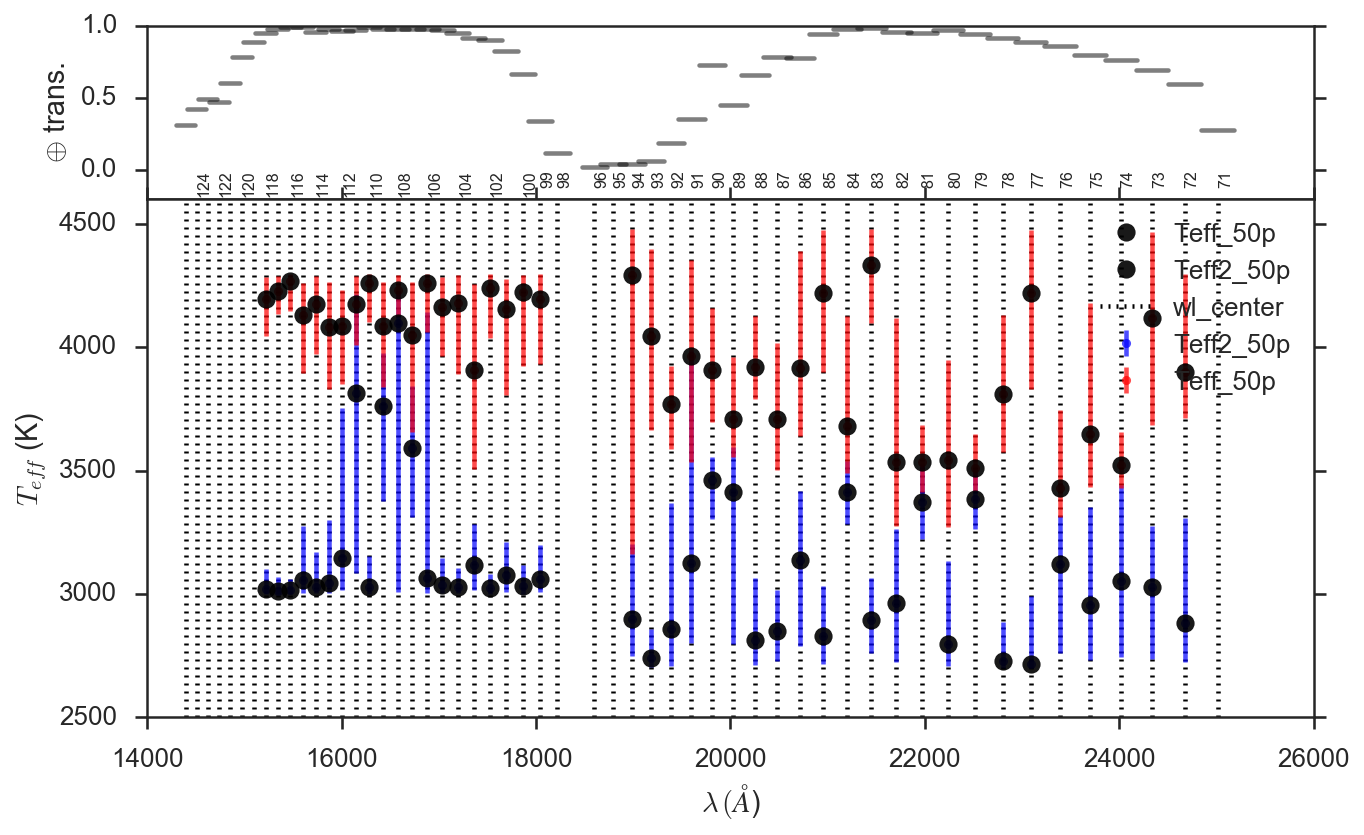

In [12]:
#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [sf_dat.wl_start[i], sf_dat.wl_end[i]]
    y = [sf_dat.tell_trans[i]]*2
    ax1.plot(x, y, 'k-', alpha=0.5)
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    print_every = 1
    if sf_dat.m_val[i] > 100:
        print_every = 2
    if (sf_dat.number.values[i] % print_every) == 0:
        ax1.text(sf_dat.wl_center[i], -0.08, '{}'.format(sf_dat.m_val.values[i]),
                 fontsize=8, rotation=90)
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

ax.vlines(sf_dat2.wl_center, 2500, 5000, linestyles='dotted')
#ax.plot(sf_dat2.wl_center, sf_dat2.Teff_50p, 'bs', alpha=0.5)
#ax.plot(sf_dat.wl_center, sf_dat.Teff_50p, 'ro', alpha=0.5)
#ax.plot(sf_dat3.wl_center, sf_dat3.Teff_50p, 'go', alpha=0.5)
ax.errorbar(sf_dat4.wl_center, sf_dat4.Teff2_50p, 
             yerr=(sf_dat4.Teff2_50p-sf_dat4.Teff2_05p,
                  sf_dat4.Teff2_95p-sf_dat4.Teff2_50p),fmt='b.', alpha=0.7)
ax.errorbar(sf_dat4.wl_center, sf_dat4.Teff_50p, 
             yerr=(sf_dat4.Teff_50p-sf_dat4.Teff_05p,
                  sf_dat4.Teff_95p-sf_dat4.Teff_50p),fmt='r.', alpha=0.7)
ax.plot(sf_dat4.wl_center, sf_dat4.Teff_50p, 'ko', alpha=0.9)
ax.plot(sf_dat4.wl_center, sf_dat4.Teff2_50p, 'ko', alpha=0.9)

ax.set_ylim(2500, 4600)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$T_{eff}$ (K)')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')
plt.savefig('LkCa4_HK_mixTeff_by_order.pdf', bbox_inches='tight')

In [13]:
sns.set_context('poster')

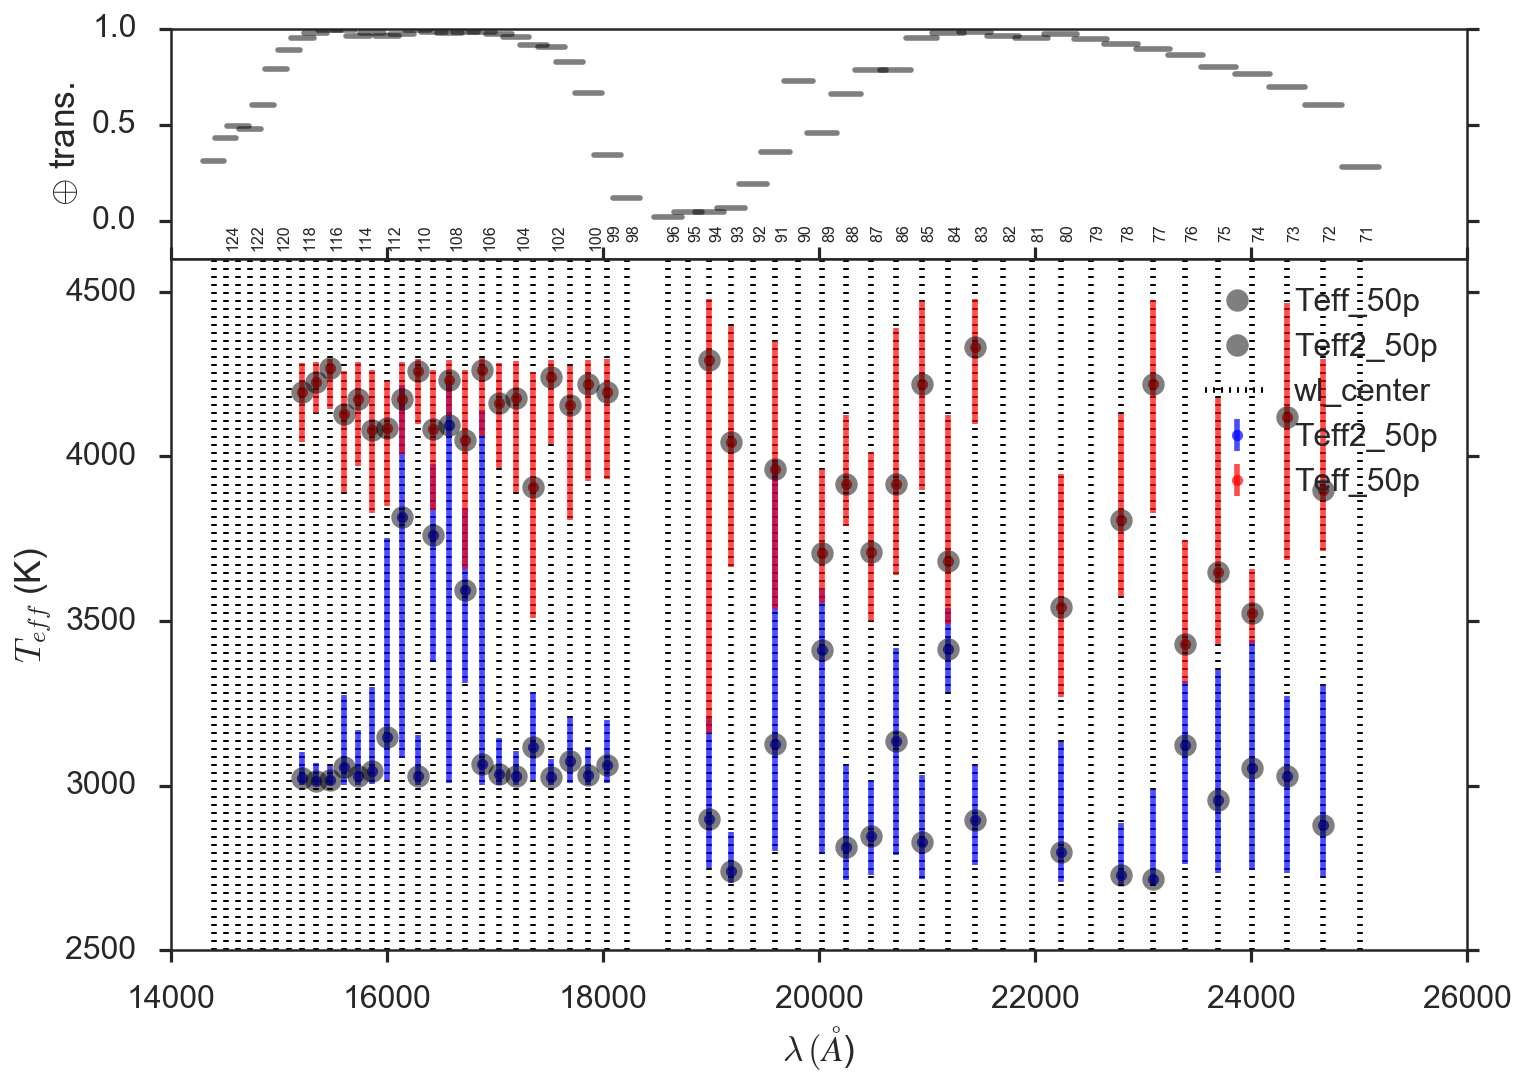

In [14]:
#plt.subplot(211)
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [sf_dat.wl_start[i], sf_dat.wl_end[i]]
    y = [sf_dat.tell_trans[i]]*2
    ax1.plot(x, y, 'k-', alpha=0.5)
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    print_every = 1
    if sf_dat.m_val[i] > 100:
        print_every = 2
    if (sf_dat.number.values[i] % print_every) == 0:
        ax1.text(sf_dat.wl_center[i], -0.08, '{}'.format(sf_dat.m_val.values[i]),
                 fontsize=8, rotation=90)
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

ax.vlines(sf_dat2.wl_center, 2500, 5000, linestyles='dotted')
#ax.plot(sf_dat2.wl_center, sf_dat2.Teff_50p, 'bs', alpha=0.5)
#ax.plot(sf_dat.wl_center, sf_dat.Teff_50p, 'ro', alpha=0.5)
#ax.plot(sf_dat3.wl_center, sf_dat3.Teff_50p, 'go', alpha=0.5)
ax.errorbar(sf_dat4_cln.wl_center, sf_dat4_cln.Teff2_50p, 
             yerr=(sf_dat4_cln.Teff2_50p-sf_dat4_cln.Teff2_05p,
                  sf_dat4_cln.Teff2_95p-sf_dat4_cln.Teff2_50p),fmt='b.', alpha=0.7)
ax.errorbar(sf_dat4_cln.wl_center, sf_dat4_cln.Teff_50p, 
             yerr=(sf_dat4_cln.Teff_50p-sf_dat4_cln.Teff_05p,
                  sf_dat4_cln.Teff_95p-sf_dat4_cln.Teff_50p),fmt='r.', alpha=0.7)
ax.plot(sf_dat4_cln.wl_center, sf_dat4_cln.Teff_50p, 'ko', alpha=0.5)
ax.plot(sf_dat4_cln.wl_center, sf_dat4_cln.Teff2_50p, 'ko', alpha=0.5)

ax.set_ylim(2500, 4600)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$T_{eff}$ (K)')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')
#plt.savefig('LkCa4_HK_mixTeff_by_order.pdf', bbox_inches='tight')
plt.savefig('../results/coolstars19/LkCa4_HK_mixTeff_poster.pdf', bbox_inches='tight')

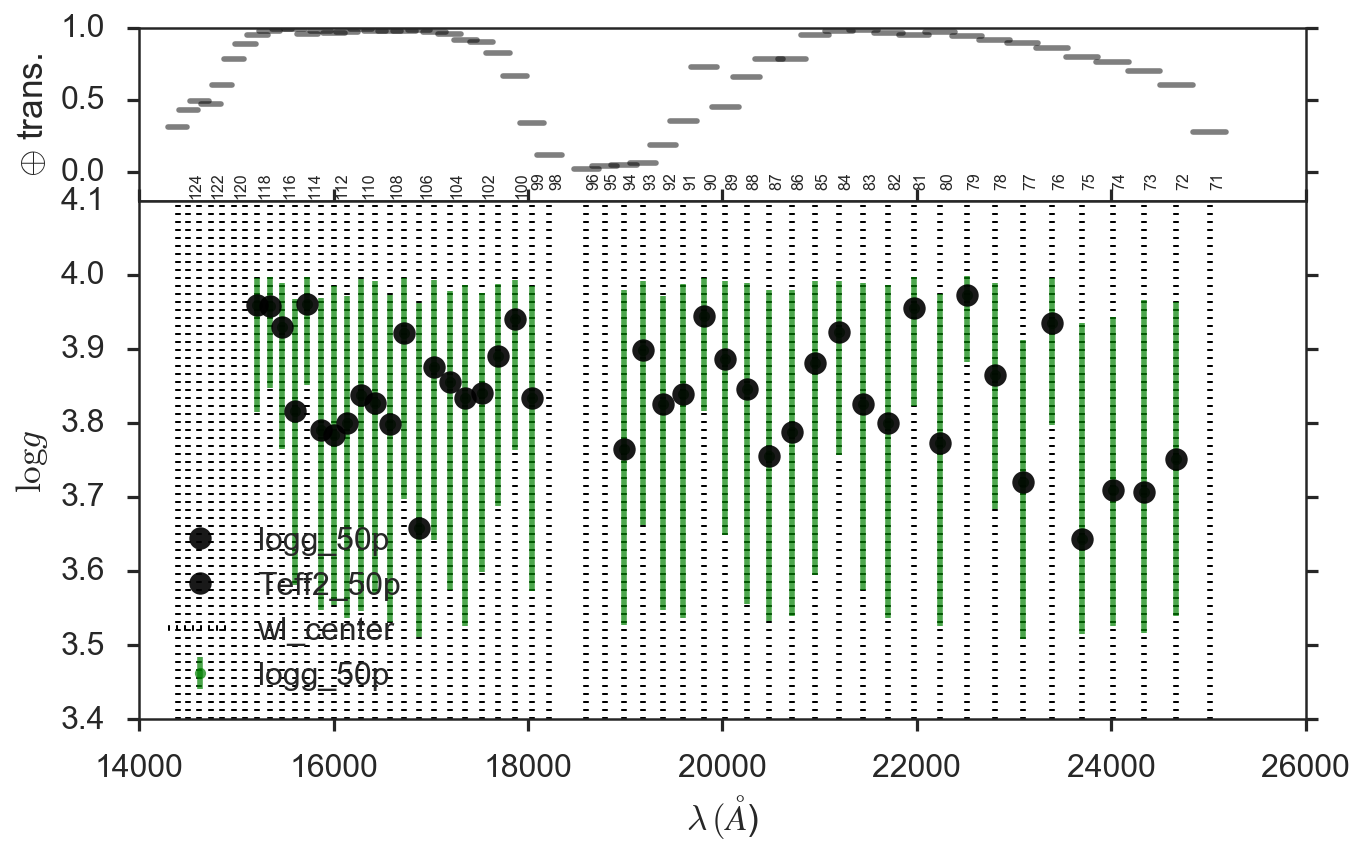

In [15]:
#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [sf_dat.wl_start[i], sf_dat.wl_end[i]]
    y = [sf_dat.tell_trans[i]]*2
    ax1.plot(x, y, 'k-', alpha=0.5)
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    print_every = 1
    if sf_dat.m_val[i] > 100:
        print_every = 2
    if (sf_dat.number.values[i] % print_every) == 0:
        ax1.text(sf_dat.wl_center[i], -0.08, '{}'.format(sf_dat.m_val.values[i]),
                 fontsize=8, rotation=90)
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

ax.vlines(sf_dat2.wl_center, 3.4, 4.1, linestyles='dotted')
#ax.plot(sf_dat2.wl_center, sf_dat2.logg_50p, 'bs', alpha=0.5)
#ax.plot(sf_dat.wl_center, sf_dat.logg_50p, 'ro', alpha=0.5)
#ax.plot(sf_dat3.wl_center, sf_dat3.logg_50p, 'go', alpha=0.5)
ax.errorbar(sf_dat4.wl_center, sf_dat4.logg_50p, 
             yerr=(sf_dat4.logg_50p-sf_dat4.logg_05p,
                  sf_dat4.logg_95p-sf_dat4.logg_50p),fmt='g.', alpha=0.7)
ax.plot(sf_dat4.wl_center, sf_dat4.logg_50p, 'ko', alpha=0.9)
ax.plot(sf_dat4.wl_center, sf_dat4.Teff2_50p, 'ko', alpha=0.9)

ax.set_ylim(3.4, 4.1)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$\log{g}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')
#plt.savefig('LkCa4_HK_mixlogg_by_order.pdf', bbox_inches='tight')

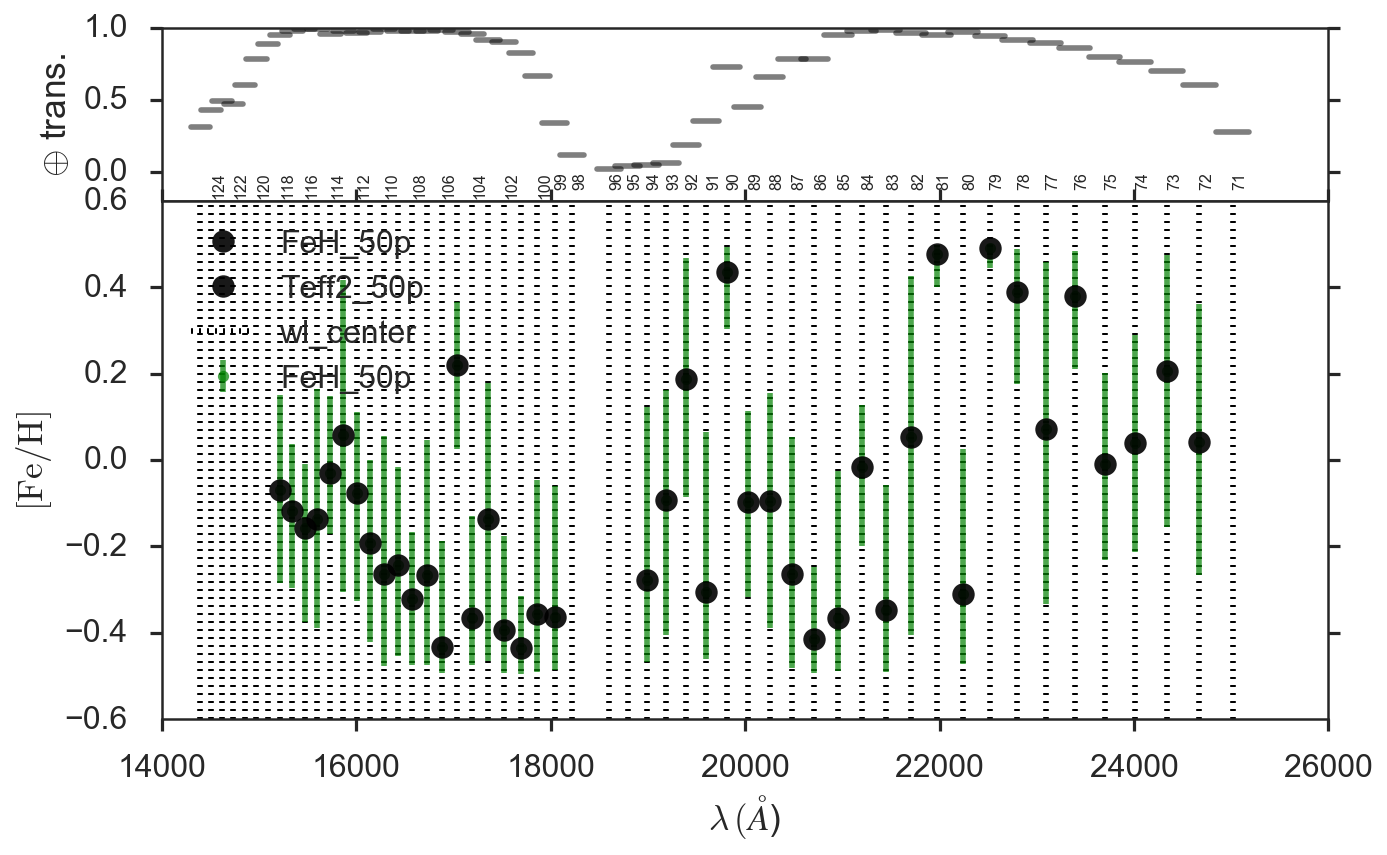

In [16]:
#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [sf_dat.wl_start[i], sf_dat.wl_end[i]]
    y = [sf_dat.tell_trans[i]]*2
    ax1.plot(x, y, 'k-', alpha=0.5)
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    print_every = 1
    if sf_dat.m_val[i] > 100:
        print_every = 2
    if (sf_dat.number.values[i] % print_every) == 0:
        ax1.text(sf_dat.wl_center[i], -0.08, '{}'.format(sf_dat.m_val.values[i]),
                 fontsize=8, rotation=90)
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

ax.vlines(sf_dat2.wl_center, -0.6, 0.6, linestyles='dotted')
#ax.plot(sf_dat2.wl_center, sf_dat2.FeH_50p, 'bs', alpha=0.5)
#ax.plot(sf_dat.wl_center, sf_dat.FeH_50p, 'ro', alpha=0.5)
#ax.plot(sf_dat3.wl_center, sf_dat3.FeH_50p, 'go', alpha=0.5)
ax.errorbar(sf_dat4.wl_center, sf_dat4.FeH_50p, 
             yerr=(sf_dat4.FeH_50p-sf_dat4.FeH_05p,
                  sf_dat4.FeH_95p-sf_dat4.FeH_50p),fmt='g.', alpha=0.7)
ax.plot(sf_dat4.wl_center, sf_dat4.FeH_50p, 'ko', alpha=0.9)
ax.plot(sf_dat4.wl_center, sf_dat4.Teff2_50p, 'ko', alpha=0.9)

ax.set_ylim(-0.6, 0.6)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$[\mathrm{Fe}/\mathrm{H}]$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')
#plt.savefig('LkCa4_HK_mixFeH_by_order.pdf', bbox_inches='tight')

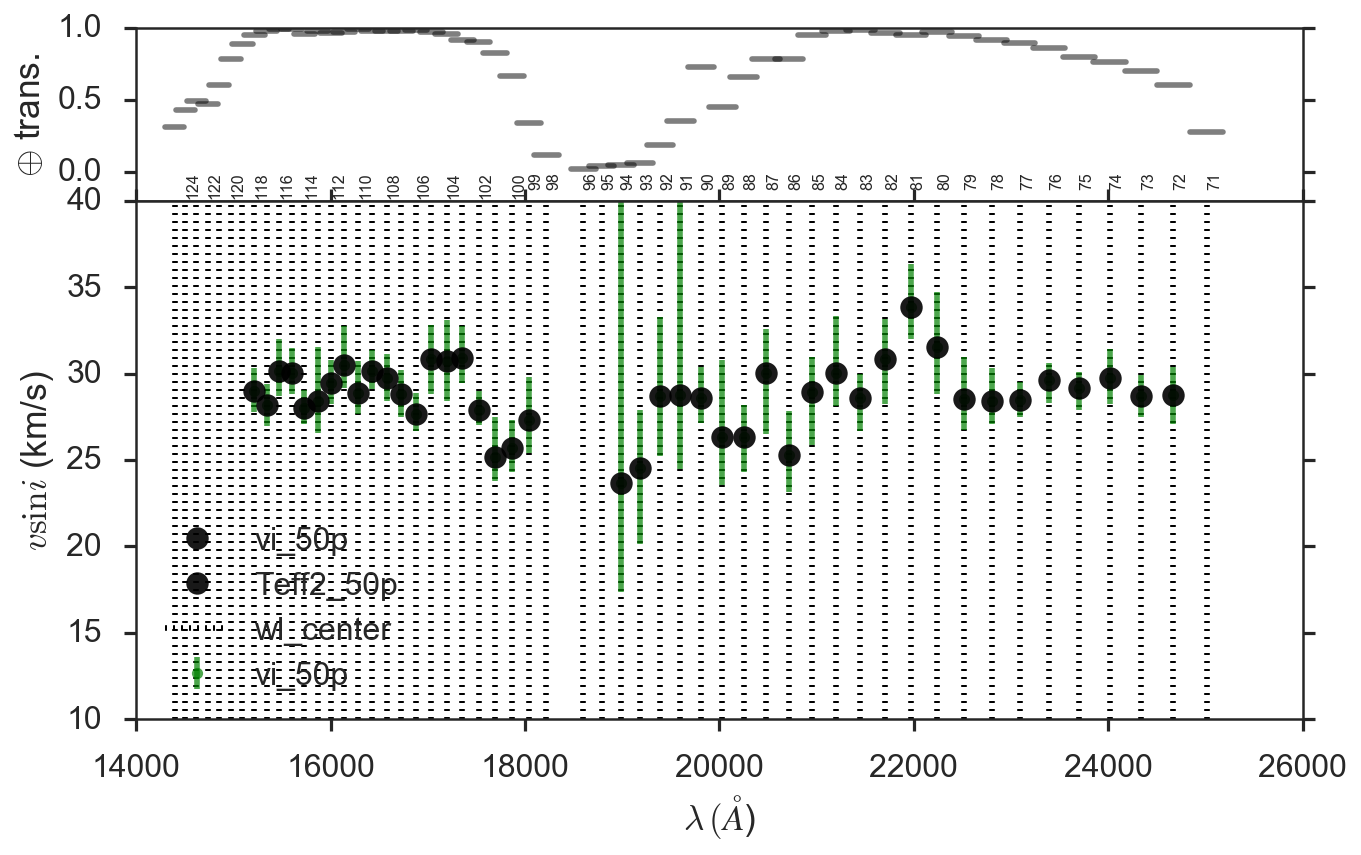

In [17]:
#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [sf_dat.wl_start[i], sf_dat.wl_end[i]]
    y = [sf_dat.tell_trans[i]]*2
    ax1.plot(x, y, 'k-', alpha=0.5)
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    print_every = 1
    if sf_dat.m_val[i] > 100:
        print_every = 2
    if (sf_dat.number.values[i] % print_every) == 0:
        ax1.text(sf_dat.wl_center[i], -0.08, '{}'.format(sf_dat.m_val.values[i]),
                 fontsize=8, rotation=90)
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

ax.vlines(sf_dat2.wl_center, 10, 40, linestyles='dotted')
#ax.plot(sf_dat2.wl_center, sf_dat2.vi_50p, 'bs', alpha=0.5)
#ax.plot(sf_dat.wl_center, sf_dat.vi_50p, 'ro', alpha=0.5)
#ax.plot(sf_dat3.wl_center, sf_dat3.vi_50p, 'go', alpha=0.5)
ax.errorbar(sf_dat4.wl_center, sf_dat4.vi_50p, 
             yerr=(sf_dat4.vi_50p-sf_dat4.vi_05p,
                  sf_dat4.vi_95p-sf_dat4.vi_50p),fmt='g.', alpha=0.7)
ax.plot(sf_dat4.wl_center, sf_dat4.vi_50p, 'ko', alpha=0.9)
ax.plot(sf_dat4.wl_center, sf_dat4.Teff2_50p, 'ko', alpha=0.9)

ax.set_ylim(10, 40)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$v \sin{i}$ (km/s)')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')
#plt.savefig('LkCa4_HK_mixvi_by_order.pdf', bbox_inches='tight')

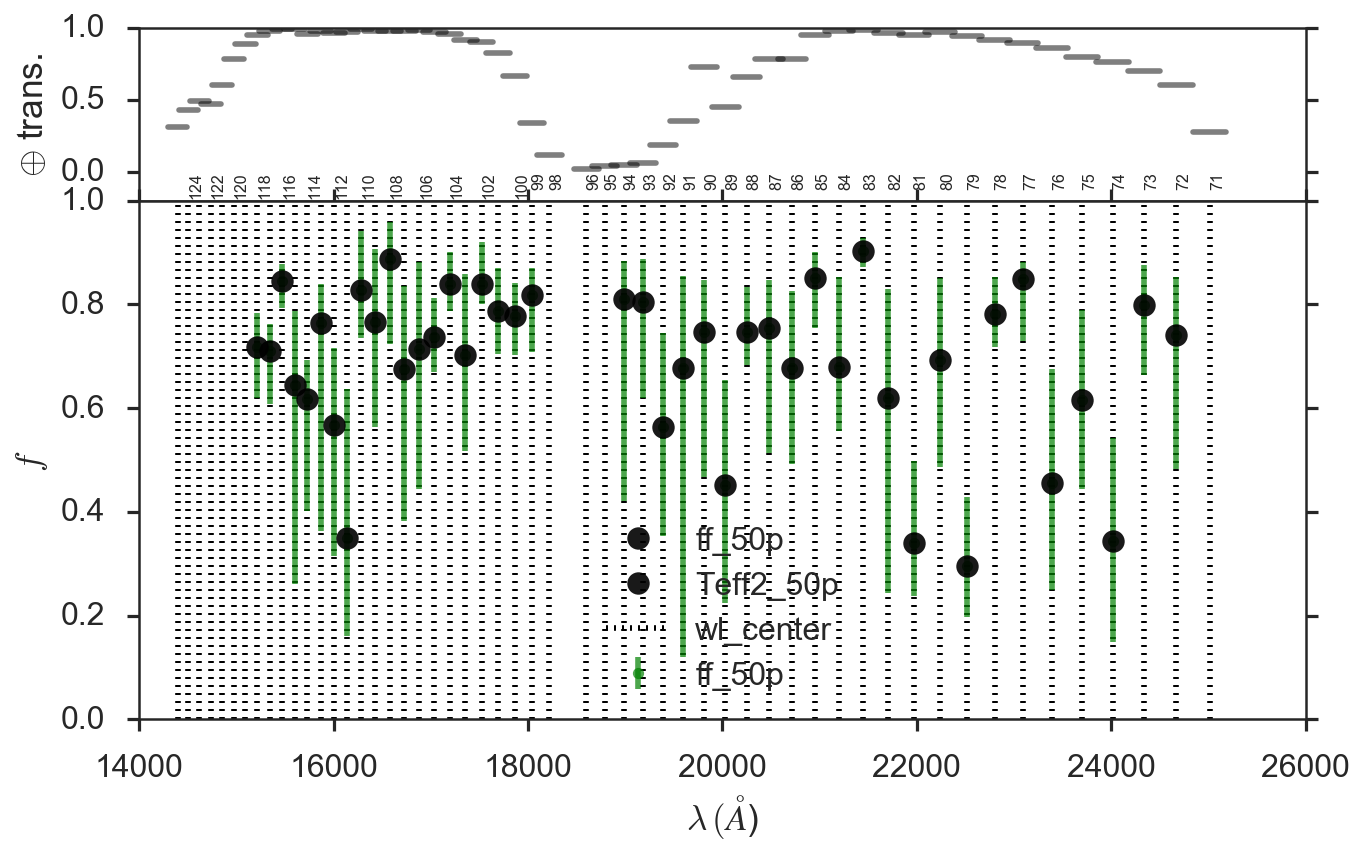

In [18]:
#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [sf_dat.wl_start[i], sf_dat.wl_end[i]]
    y = [sf_dat.tell_trans[i]]*2
    ax1.plot(x, y, 'k-', alpha=0.5)
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    print_every = 1
    if sf_dat.m_val[i] > 100:
        print_every = 2
    if (sf_dat.number.values[i] % print_every) == 0:
        ax1.text(sf_dat.wl_center[i], -0.08, '{}'.format(sf_dat.m_val.values[i]),
                 fontsize=8, rotation=90)
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

ax.vlines(sf_dat2.wl_center, 0, 1, linestyles='dotted')
#ax.plot(sf_dat2.wl_center, sf_dat2.ff_50p, 'bs', alpha=0.5)
#ax.plot(sf_dat.wl_center, sf_dat.ff_50p, 'ro', alpha=0.5)
#ax.plot(sf_dat3.wl_center, sf_dat3.ff_50p, 'go', alpha=0.5)
ax.errorbar(sf_dat4.wl_center, sf_dat4.ff_50p, 
             yerr=(sf_dat4.ff_50p-sf_dat4.ff_05p,
                  sf_dat4.ff_95p-sf_dat4.ff_50p),fmt='g.', alpha=0.7)
ax.plot(sf_dat4.wl_center, sf_dat4.ff_50p, 'ko', alpha=0.9)
ax.plot(sf_dat4.wl_center, sf_dat4.Teff2_50p, 'ko', alpha=0.9)

ax.set_ylim(0, 1)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$f$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')
#plt.savefig('LkCa4_HK_mixff_by_order.pdf', bbox_inches='tight')

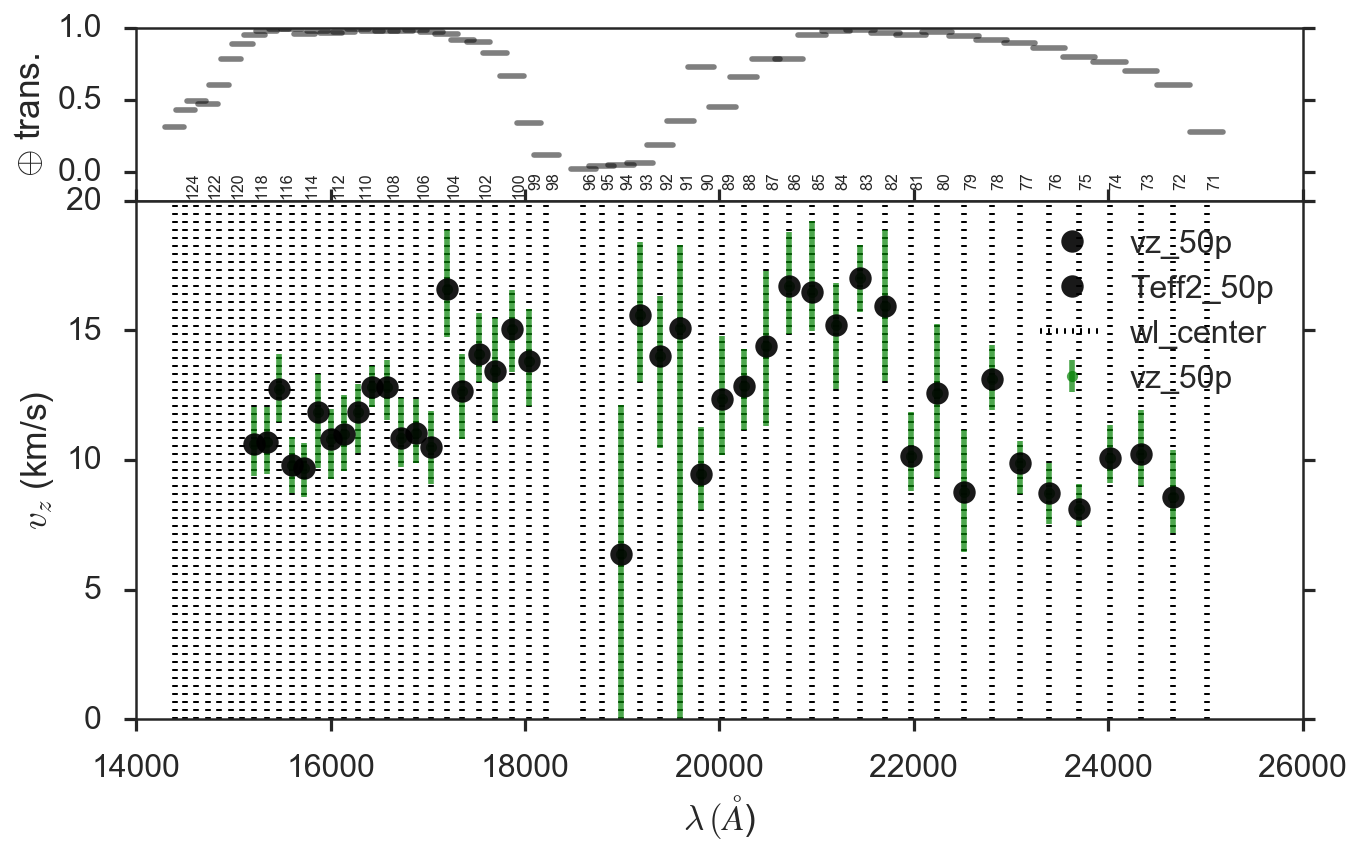

In [19]:
#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [sf_dat.wl_start[i], sf_dat.wl_end[i]]
    y = [sf_dat.tell_trans[i]]*2
    ax1.plot(x, y, 'k-', alpha=0.5)
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    print_every = 1
    if sf_dat.m_val[i] > 100:
        print_every = 2
    if (sf_dat.number.values[i] % print_every) == 0:
        ax1.text(sf_dat.wl_center[i], -0.08, '{}'.format(sf_dat.m_val.values[i]),
                 fontsize=8, rotation=90)
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

ax.vlines(sf_dat2.wl_center, 0, 20, linestyles='dotted')
#ax.plot(sf_dat2.wl_center, sf_dat2.vz_50p, 'bs', alpha=0.5)
#ax.plot(sf_dat.wl_center, sf_dat.vz_50p, 'ro', alpha=0.5)
#ax.plot(sf_dat3.wl_center, sf_dat3.vz_50p, 'go', alpha=0.5)
ax.errorbar(sf_dat4.wl_center, sf_dat4.vz_50p, 
             yerr=(sf_dat4.vz_50p-sf_dat4.vz_05p,
                  sf_dat4.vz_95p-sf_dat4.vz_50p),fmt='g.', alpha=0.7)
ax.plot(sf_dat4.wl_center, sf_dat4.vz_50p, 'ko', alpha=0.9)
ax.plot(sf_dat4.wl_center, sf_dat4.Teff2_50p, 'ko', alpha=0.9)

ax.set_ylim(0, 20)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$v_z$ (km/s)')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')
#plt.savefig('LkCa4_HK_mixvz_by_order.pdf', bbox_inches='tight')

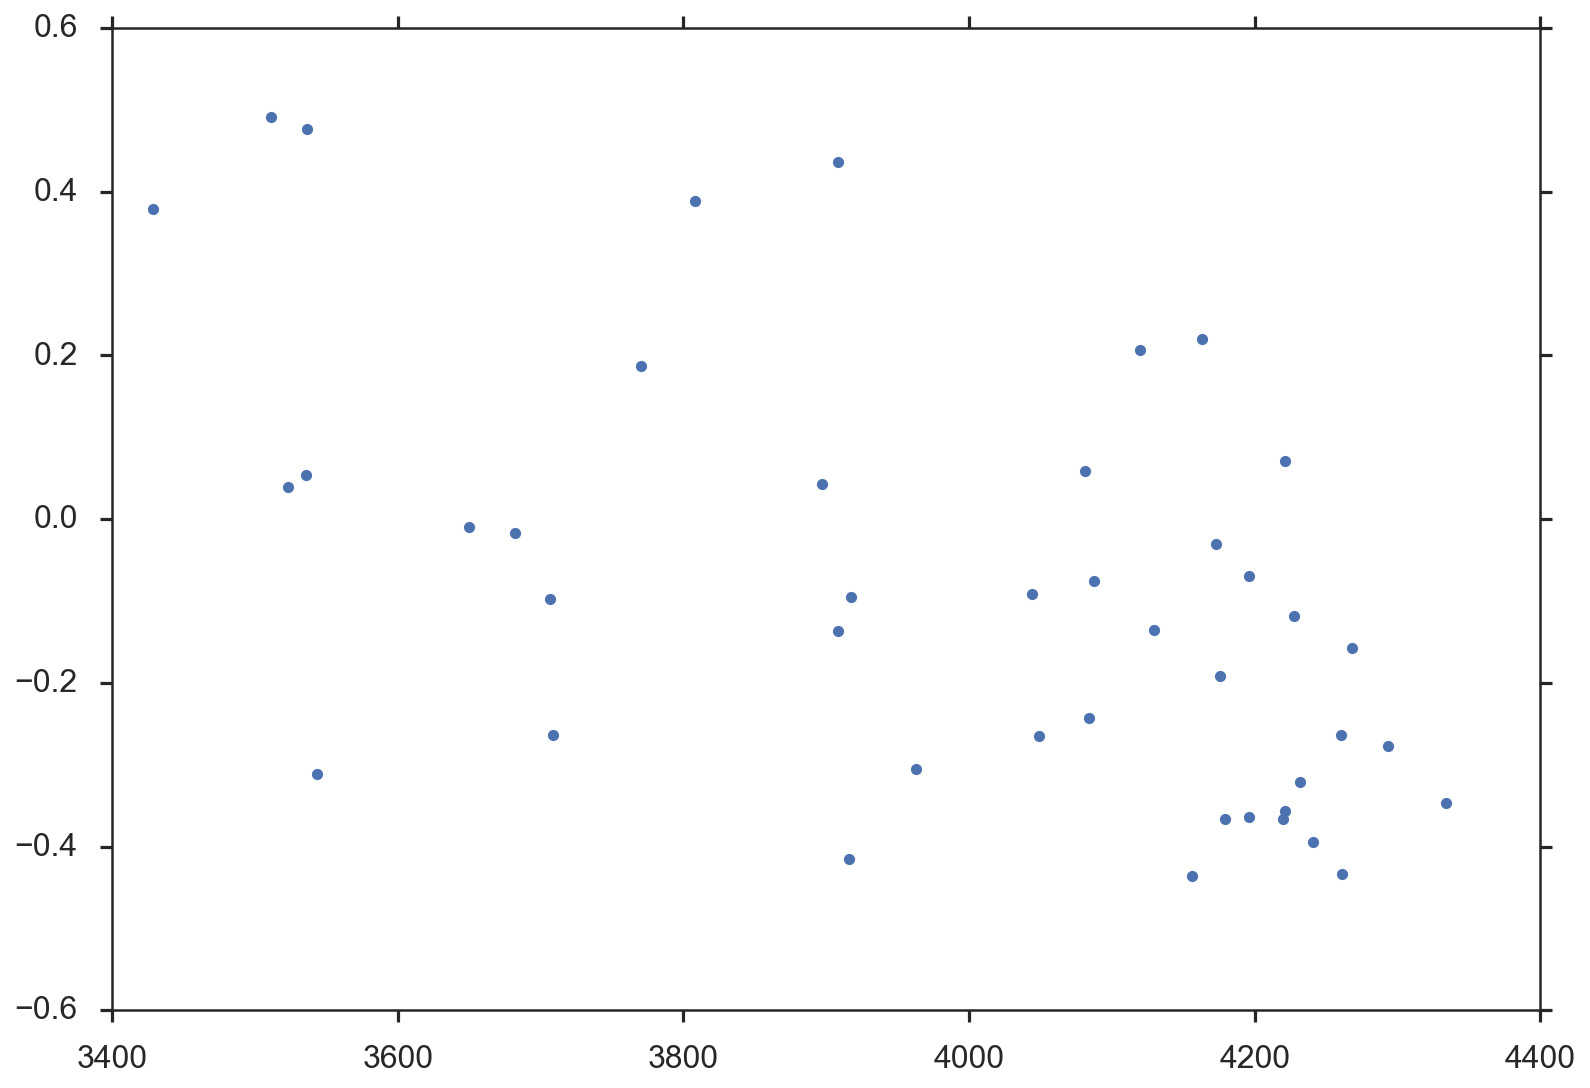

In [20]:
plt.plot(sf_dat4.Teff_50p, sf_dat4.FeH_50p, '.')

In [21]:
sns.set_context('poster')

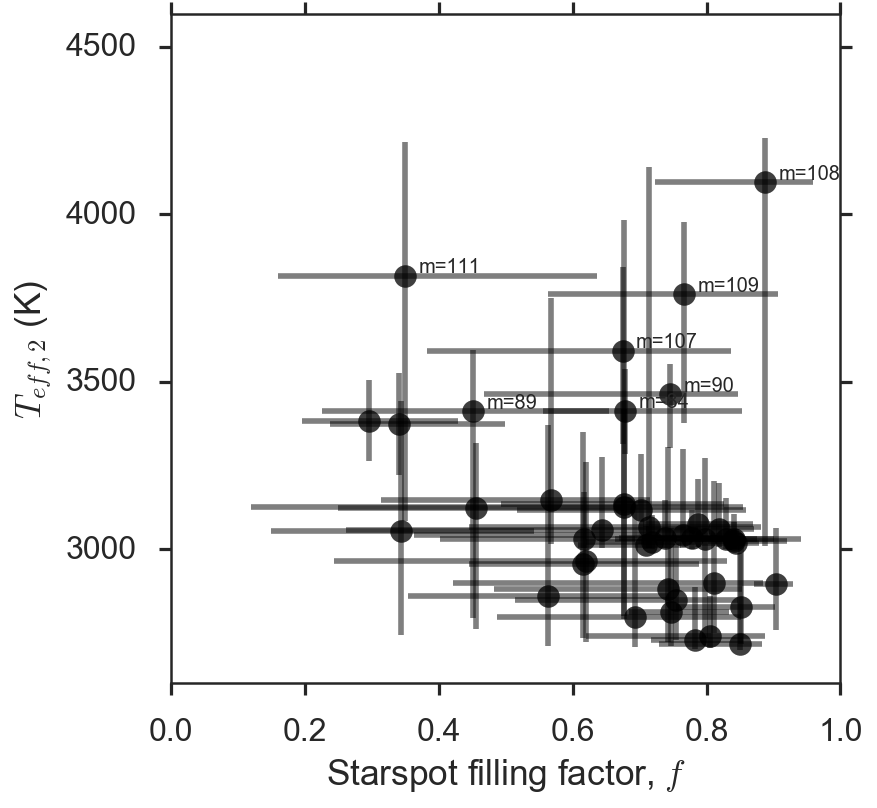

In [22]:
plt.figure(figsize=(6, 6))
plt.plot(sf_dat4.ff_50p, sf_dat4.Teff2_50p, 'ko', alpha=0.5)
plt.errorbar(sf_dat4.ff_50p, sf_dat4.Teff2_50p, 
             yerr=(sf_dat4.Teff2_50p-sf_dat4.Teff2_05p,
                  sf_dat4.Teff2_95p-sf_dat4.Teff2_50p),
             xerr=(sf_dat4.ff_50p-sf_dat4.ff_05p,
                  sf_dat4.ff_95p-sf_dat4.ff_50p), fmt='ko', alpha=0.5)
#plt.plot(sf_dat4.ff_50p, sf_dat4.Teff_05p, 'rv', alpha=0.5)
#plt.plot(sf_dat4.ff_50p, sf_dat4.Teff_95p, 'rs', alpha=0.5)
bi = sf_dat4.Teff2_50p > 3400
subset = sf_dat4[bi]

subset.reset_index(inplace=True)

for i in range(len(subset)):
    plt.text(subset.ff_50p[i]+0.02, subset.Teff2_50p[i]+10, "m={}".format(subset.m_val[i]))

plt.ylabel('$T_{eff,2}$ (K)')
plt.xlabel('Starspot filling factor, $f$')
plt.xlim(0,1)
plt.ylim(2600,4600)
#plt.savefig('../results/fig/LkCa4_starspot_IGRINSorders.pdf')
plt.savefig('../results/coolstars19/LkCa4_starspot_poster.pdf', bbox_inches='tight')

(0, 20)

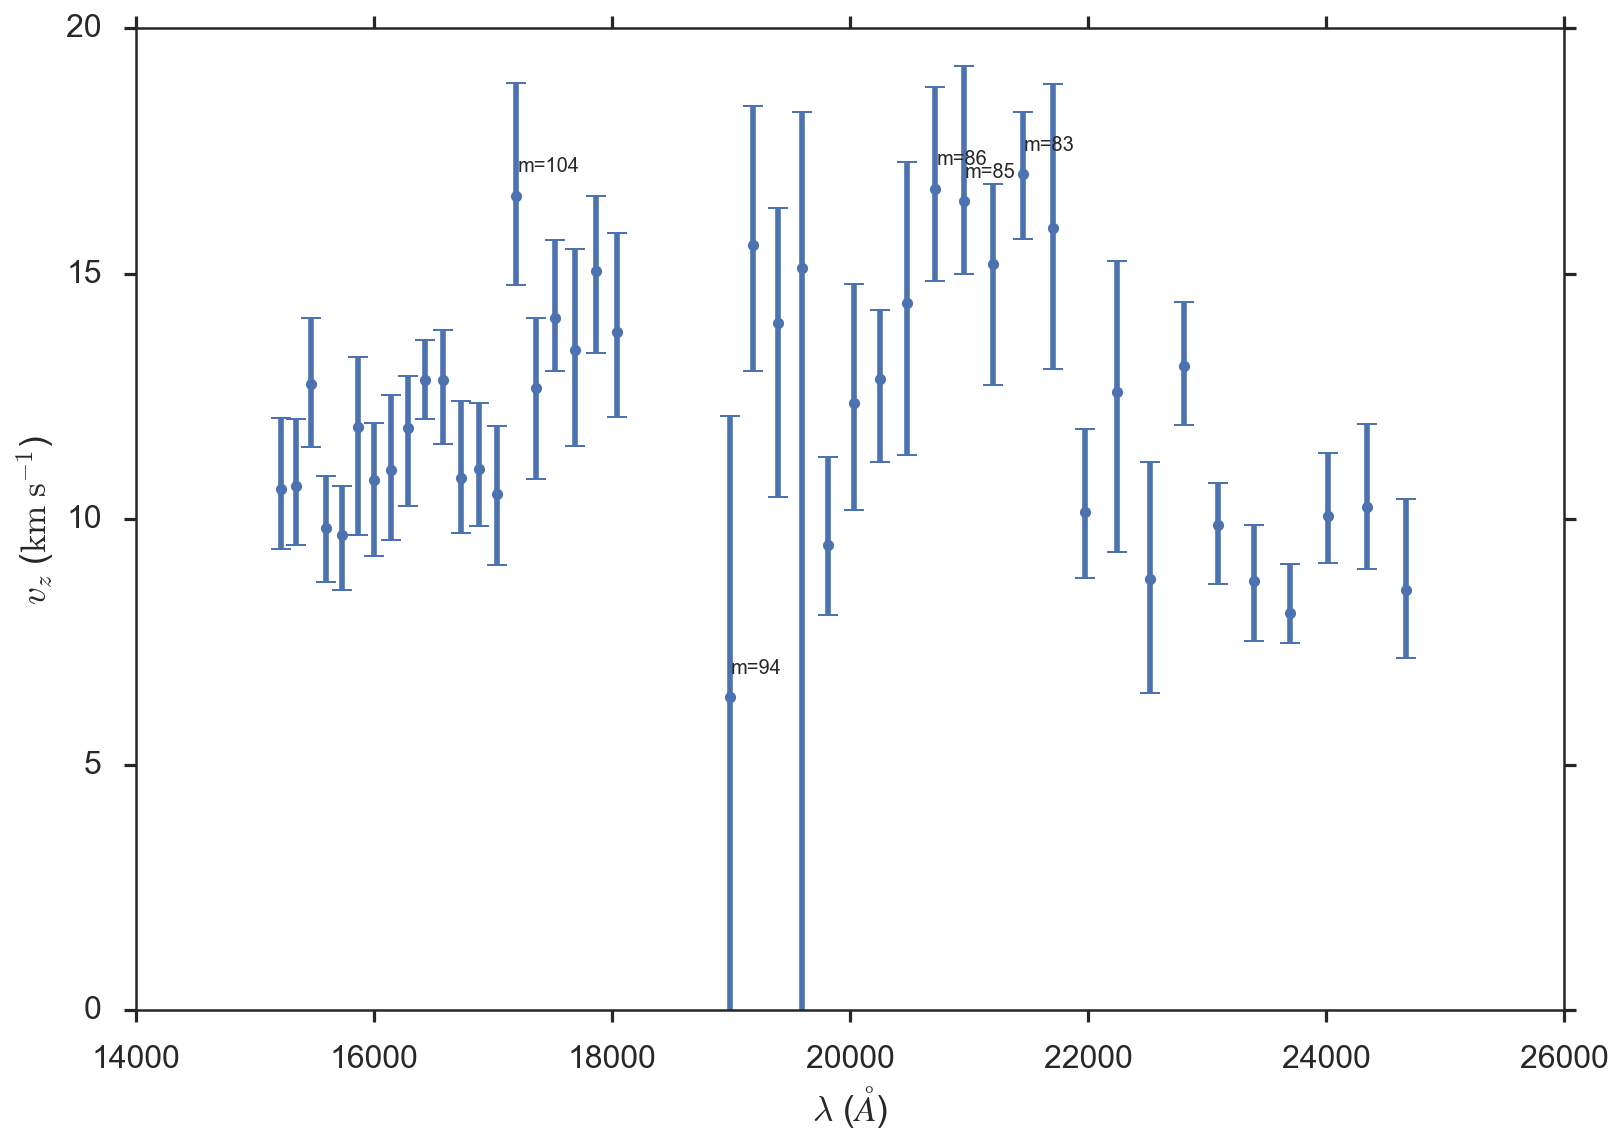

In [23]:
#plt.plot(sf_dat4.wl_center, sf_dat4.vz_50p, '.')
plt.errorbar(sf_dat4.wl_center, sf_dat4.vz_50p, 
             (sf_dat4.vz_50p-sf_dat4.vz_05p, sf_dat4.vz_95p-sf_dat4.vz_50p), 
             fmt='.', barsabove=True, capsize=5, capthick=1)

bi = (sf_dat4.vz_50p > 16) | (sf_dat4.vz_50p < 8)
subset = sf_dat4[bi]

subset.reset_index(inplace=True)

for i in range(len(subset)):
    plt.text(subset.wl_center[i]+10, subset.vz_50p[i]+0.5, "m={}".format(subset.m_val[i]))

plt.ylabel('$v_{z}$ ($\mathrm{km \; s}^{-1}$)')
plt.xlabel('$\lambda$ ($\AA$)')
plt.ylim(0, 20)

In [24]:
import astropy.constants as c

In [25]:
v = c.c/45000

In [26]:
import astropy.units as u

In [27]:
v.to(u.km/u.s)

<Quantity 6.662054622222222 km / s>

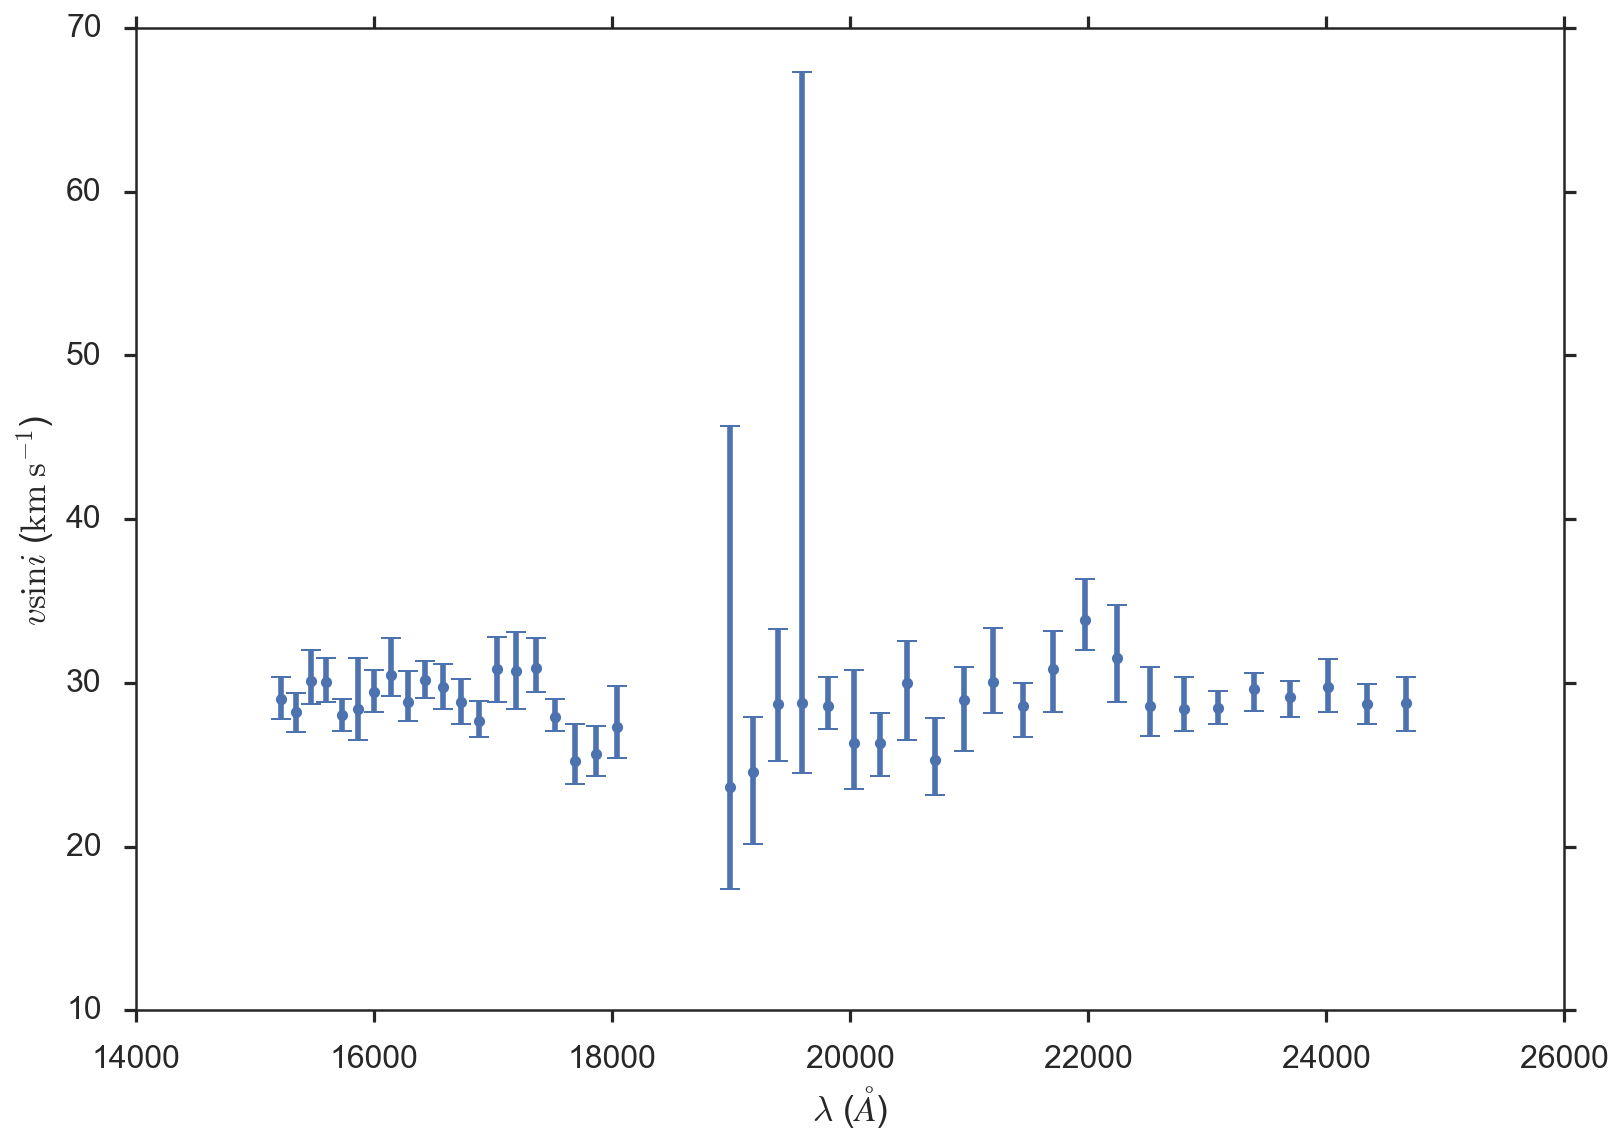

In [28]:
#plt.plot(sf_dat4.wl_center, sf_dat4.vz_50p, '.')
plt.errorbar(sf_dat4.wl_center, sf_dat4.vi_50p, 
             (sf_dat4.vi_50p-sf_dat4.vi_05p, sf_dat4.vi_95p-sf_dat4.vi_50p), 
             fmt='.', barsabove=True, capsize=5, capthick=1)
plt.ylabel('$v\sin{i}$ ($\mathrm{km \; s}^{-1}$)')
plt.xlabel('$\lambda$ ($\AA$)')

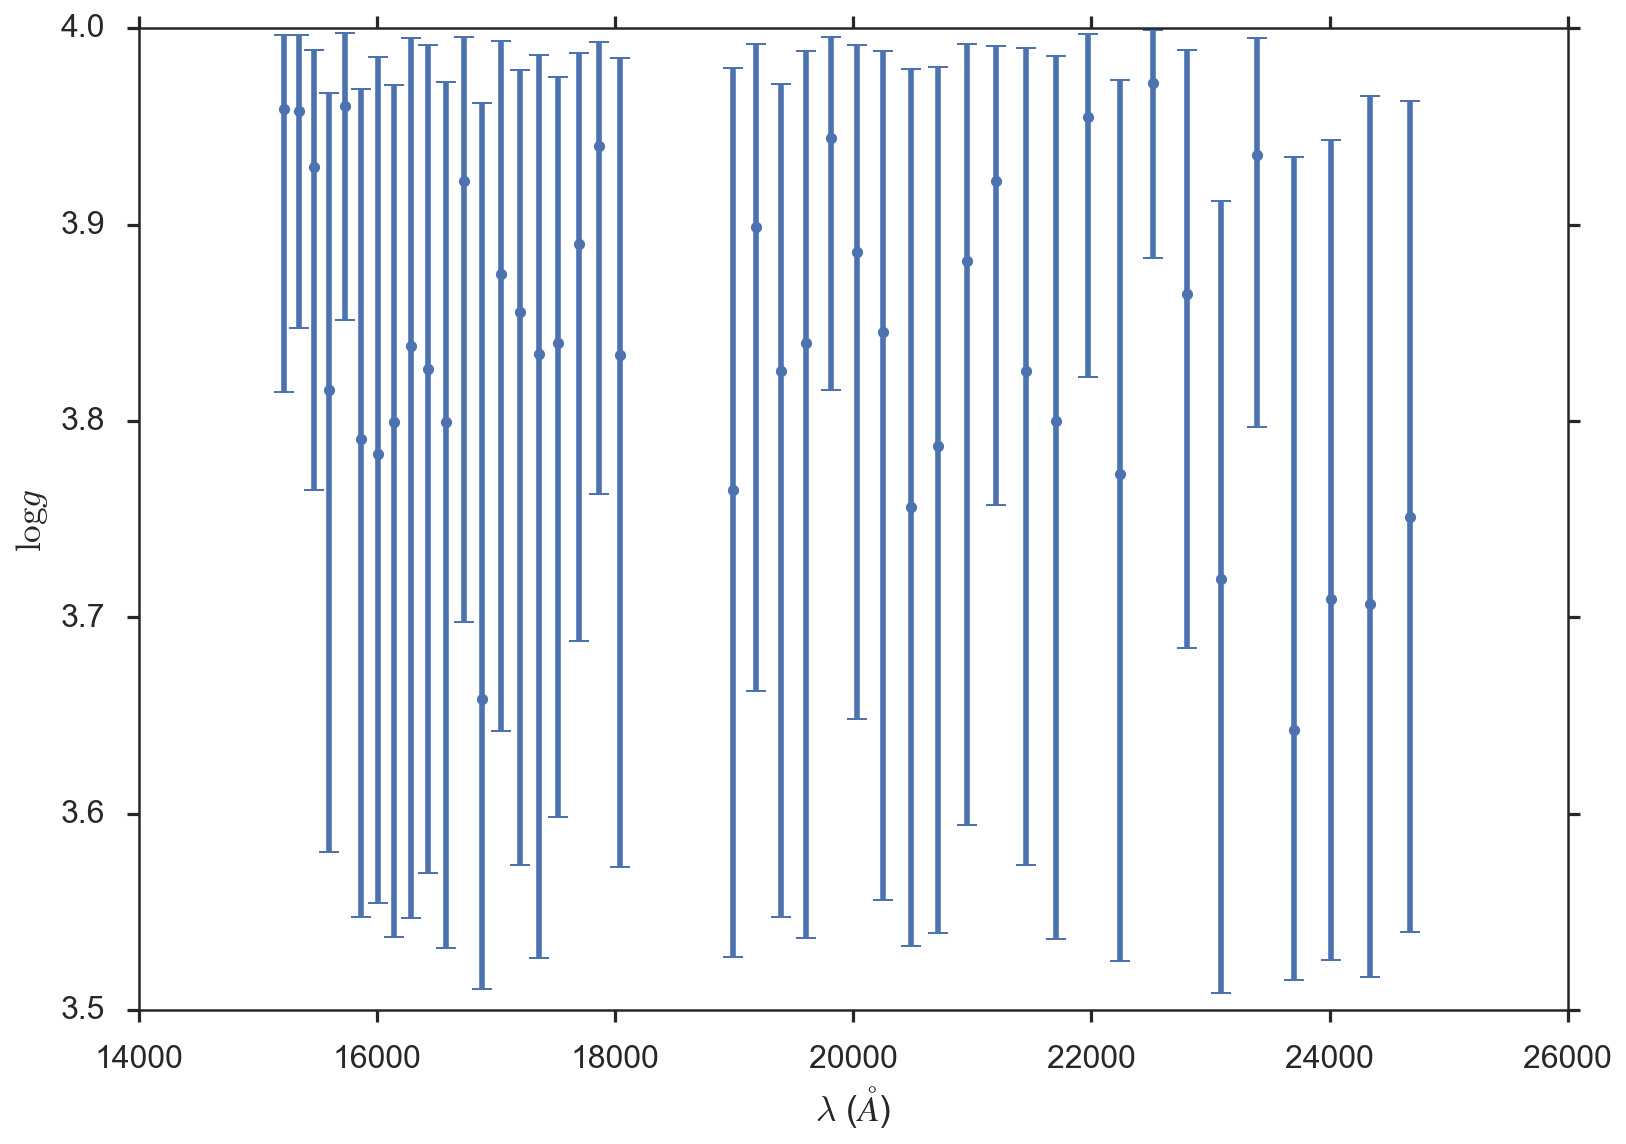

In [29]:
#plt.plot(sf_dat4.wl_center, sf_dat4.vz_50p, '.')
plt.errorbar(sf_dat4.wl_center, sf_dat4.logg_50p, 
             (sf_dat4.logg_50p-sf_dat4.logg_05p, sf_dat4.logg_95p-sf_dat4.logg_50p), 
             fmt='.', barsabove=True, capsize=5, capthick=1)
plt.ylabel('$\log{g}$')
plt.xlabel('$\lambda$ ($\AA$)')

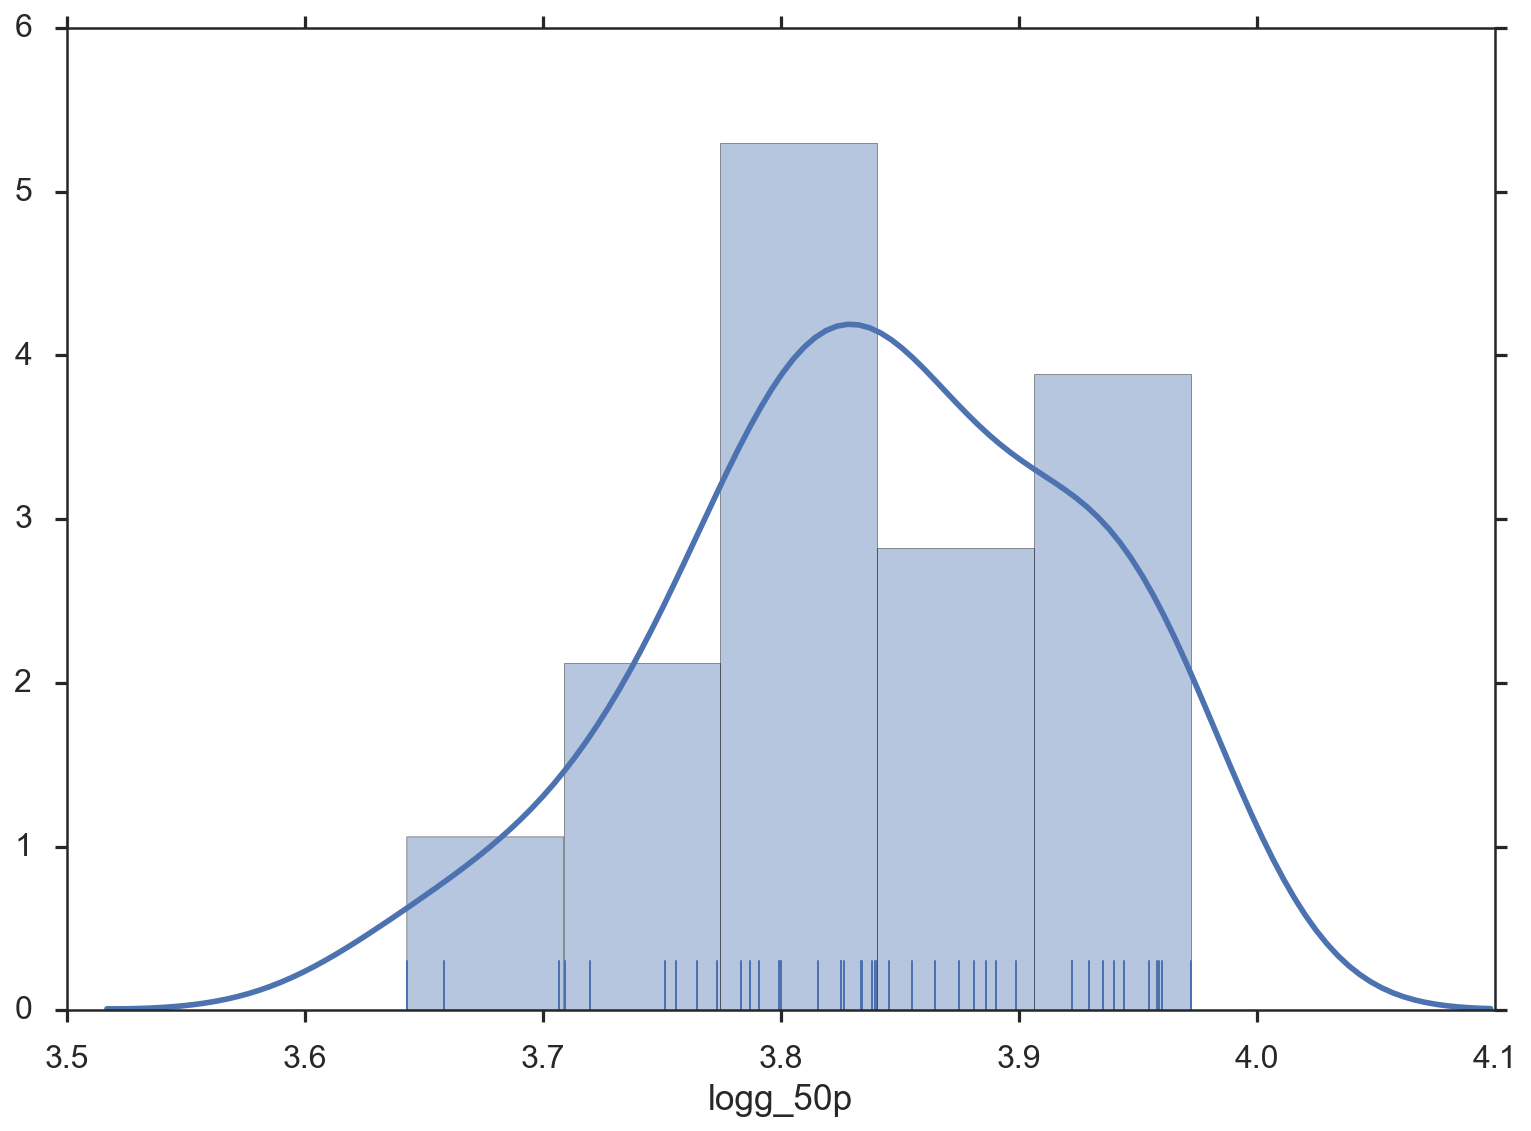

In [30]:
sns.distplot(sf_dat4.logg_50p[sf_dat4.logg_50p == sf_dat4.logg_50p], rug=True)

In [31]:
gi = sf_dat4.logg_50p == sf_dat4.logg_50p

In [32]:
vals = sf_dat4.logg_50p[gi]

In [33]:
logg = np.average(sf_dat4.logg_50p[gi], weights=sf_dat4.logg_95p[gi]-sf_dat4.logg_05p[gi])

In [34]:
feh = np.average(sf_dat4.FeH_50p[gi], weights=sf_dat4.FeH_95p[gi]-sf_dat4.FeH_05p[gi])

In [35]:
logg

3.819737611584674

In [36]:
feh

-0.10559743818742225

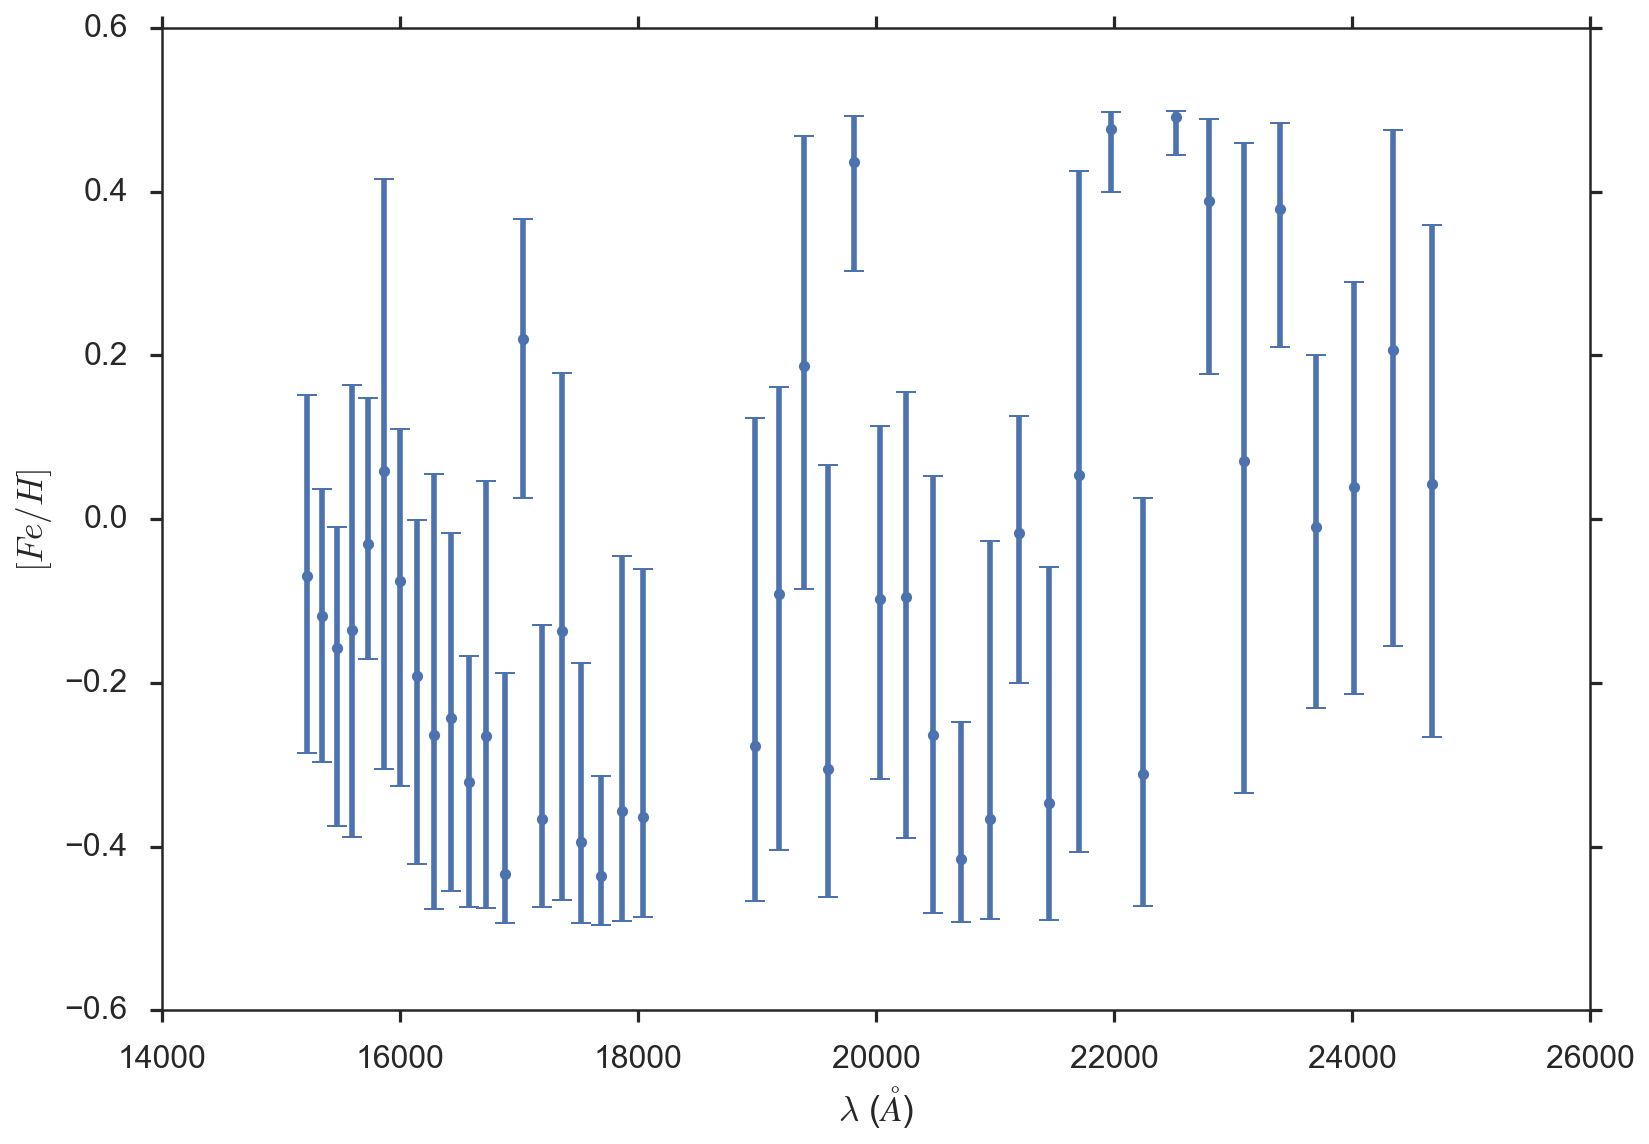

In [37]:
#plt.plot(sf_dat4.wl_center, sf_dat4.vz_50p, '.')
plt.errorbar(sf_dat4.wl_center, sf_dat4.FeH_50p, 
             (sf_dat4.FeH_50p-sf_dat4.FeH_05p, sf_dat4.FeH_95p-sf_dat4.FeH_50p), 
             fmt='.', barsabove=True, capsize=5, capthick=1)
plt.ylabel('$[Fe/H]$')
plt.xlabel('$\lambda$ ($\AA$)')

The end for now.  